# Homework 07

In [1]:
from joy import *

## Utilities

You may need to use the following functions of this homework.

### Super Grid V2

The `super_grid_v2` function creates a nxn grid and calls the `shape_maker` function to draw a shape in each cell of the grid.

The `shape_maker` function gets `size` - the size of the cell, `row`, `column` and `n` as arguments.

In [4]:
def super_grid_v2(shape_maker, n):
    size = 300/n
    r = size/2
    x = -150+r
    y = -150+r
    shapes = []
    for j in range(n):
        for i in range(n):
            c = shape_maker(size, row=j, column=i, n=n)|translate(x=x, y=y)
            shapes.append(c)
            x = x+size
        y = y+size
        x = -150+r
    return combine(shapes)

In [5]:
def make_circle(size, row, column, n):
    return circle(r=size/2)

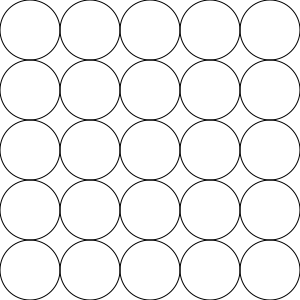

In [6]:
super_grid_v2(make_circle, 5)

### Concentric Circles

The `concentric_circles` function draws `n` concentric circles with outer circle taking the specified `radius`.

In [7]:
blank = circle(r=0, stroke="none")

def concentric_circles(radius, n):
    if n <= 0:
        return blank

    delta = radius/n
    circles = [circle(r=i*delta) for i in range(1, n+1)]
    return combine(circles)

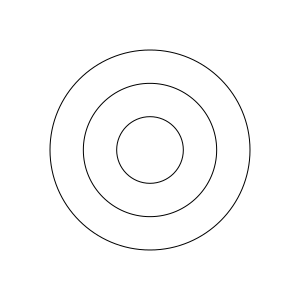

In [8]:
concentric_circles(radius=100, n=3)

### Show Table

The `show_table` is a utility to see the values an expression over row and column as a table.

In [9]:
from tabulate import tabulate

def show_table(n, expr):
    rows = list(range(n))[::-1]
    columns = list(range(n))
    headers = [""] + [f"C{c}" for c in columns]
    data = [[f"R{row}"] +[eval(expr, {"row": row, "column": column, "n": n}) for column in columns] for row in rows]    
    print(tabulate(data, headers=headers))

In [10]:
show_table(4, "row + column + 1")

      C0    C1    C2    C3
--  ----  ----  ----  ----
R3     4     5     6     7
R2     3     4     5     6
R1     2     3     4     5
R0     1     2     3     4


In [11]:
show_table(4, "column-row+4")

      C0    C1    C2    C3
--  ----  ----  ----  ----
R3     1     2     3     4
R2     2     3     4     5
R1     3     4     5     6
R0     4     5     6     7


## Problem 1

Draw the following shape.

![Problem 1](images/hw07-ellipse-stars.svg)

In [12]:
from wizard import *

In [13]:
def make_ellipse_star(size, row, column, n):
    n=(column-row+4)
    return ellipse(w=size, h=size/2)|repeat(n, rotate(180/n))

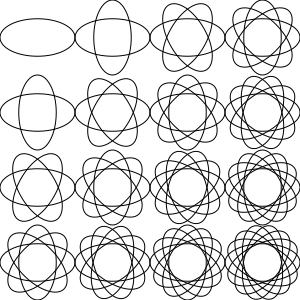

In [14]:
super_grid_v2(make_ellipse_star, 4)

## Problem 2

Draw the following shape.

![Problem 2](images/hw07-circles.svg)

In [15]:
def fat_donut(x, y, r):
    a = circle(x=x, y=y, r=r)
    b = circle(x=x, y=y, r=r/3)
    return a+b

def circle_bowl(size):
    size = 300
    ring = circle(x=100, y=0, r=size/6)|repeat(4, rotate(90))
    return ring + fat_donut(x=0, y=0, r=size/2)

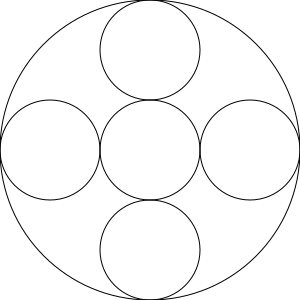

In [16]:
circle_bowl(300)

## Problem 3

Draw the following shape.

![Problem 2](images/hw07-six-circles.svg)

In [17]:
def circle_bowl(size):
    size = 300
    ring = circle(x=100, y=0, r=size/6)|repeat(6, rotate(60))
    return ring + fat_donut(x=0, y=0, r=size/2)

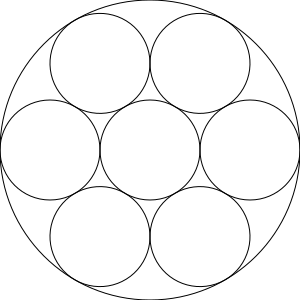

In [18]:
circle_bowl(300)

## problem 4

Write a function `circle_pattern` that takes `size` and `n` as arguments and creates the following pattern. The `size` indicates the width and height of the picture and `n` indicates the number of circles draws in each part of the picture.


<table>
    <tr>
        <td>
            <figure>
              <img src="images/hw07-circle-pattern-3.svg" alt="" />
              <figcaption style="text-align: center;"><code>circle_pattern(200, 3)</code></figcaption>
            </figure>
        </td>
        <td>
            <figure>
              <img src="images/hw07-circle-pattern-8.svg" alt="" />
              <figcaption style="text-align: center;"><code>concentric_circles(300, 8)</code></figcaption>
            </figure>
        </td>
    </tr>
</table>


In [25]:
def conbottomic_circles(r, n):
    shift = r/n
    design = [bcircle(r=i*shift) for i in range(1, n+1)]
    return combine(design)|translate(y=-r)

def circle_pattern(size, n):
    centre = concentric_circles(radius = size/6, n=n)
    layer = conbottomic_circles(r=size/6, n=n)|translate(y=size/3)|repeat(6, rotate(60))
    return centre+layer

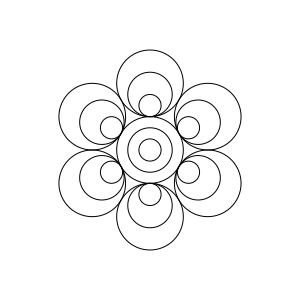

In [26]:
circle_pattern(200, 3)

## Problem 5

Can you draw the following shape?

![Problem 5](images/hw07-circles-in-triangle.svg)

Hint: Look at the `super_grid` and `super_grid_v2` functions that you have written before and see if you can modify them to achieve this.

In [31]:
show_table(6, "(int(n-row>column))")

      C0    C1    C2    C3    C4    C5
--  ----  ----  ----  ----  ----  ----
R5     1     0     0     0     0     0
R4     1     1     0     0     0     0
R3     1     1     1     0     0     0
R2     1     1     1     1     0     0
R1     1     1     1     1     1     0
R0     1     1     1     1     1     1


In [34]:
def make_circle_2(size, row, column, n):
    if n-row>column:
        return circle(r=size/2)
    else:
        return circle(r=0)

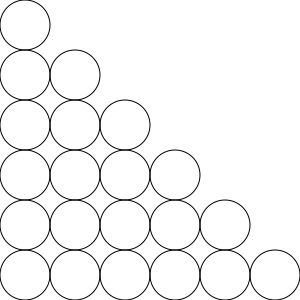

In [35]:
super_grid_v2(make_circle_2, 6)

### Problem 6 (_Optional_)

Can you generalize the solution to Problem 5 and use it to draw the following image?

You want to create a function `traingular_grid` that takes `shape_maker` and `n` as arguments, with an approach similar to `super_grid_v2`. 

![Problem 6](images/hw07-circles-in-triangle-parametric.svg)

In [37]:
def super_grid_v2(shape_maker, n):
    size = 300/n
    r = size/2
    x = -150+r
    y = -150+r
    shapes = []
    for j in range(n):
        for i in range(n):
            c = shape_maker(size, row=j, column=i, n=n)|translate(x=x, y=y)
            shapes.append(c)
            x = x+size
        y = y+size
        x = -150+r
    return combine(shapes)

We have 6 rows.
```
R0-C0
R1-C0, C1
R2-C0, C1, C2
R3-C0, C1, C2, C3
R4-C0, C1, C2, C3, C4
R5-C0, C1, C2, C3, C4, C5

```

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


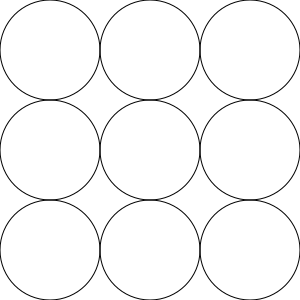

In [38]:
super_grid_v2(make_circle, 3)

In [71]:
def triangle_table(n):
    for row in range(n):
        print(f"R{row}", end=" ")
        for column in range(n-row):
            print(f"C{column}", end=" ")
        print()

In [72]:
triangle_table(6)

R0 C0 C1 C2 C3 C4 C5 
R1 C0 C1 C2 C3 C4 
R2 C0 C1 C2 C3 
R3 C0 C1 C2 
R4 C0 C1 
R5 C0 


In [81]:
def triangle_grid(shape_maker, n):
    size = 300/n
    r = size/2
    x = -150+r
    y = -150+r
    shapes = []
    for row in range(n):
        for column in range(n-row):
            c = shape_maker(size, row=n-row-1, column=column, n=n)|translate(x=x, y=y)
            shapes.append(c)
            x = x+size
        y = y+size
        x = -150+r
    return combine(shapes)

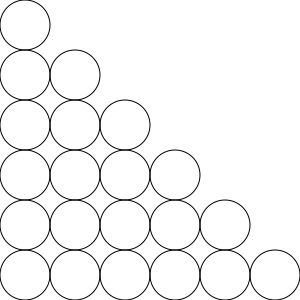

In [82]:
triangle_grid(make_circle, 6)

In [83]:
def make_concentric_circles(size, row, column, n):
    return concentric_circles(radius=size/2, n=row+column+1)

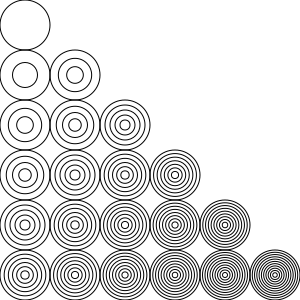

In [84]:
triangle_grid(make_concentric_circles, 6)